<a href="https://colab.research.google.com/github/swapnamoy007/ML-ASSIGNMENT/blob/main/Module_7/Homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 8 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

Please add your name and date

Swapnamoy dutta ; 11/12/2024

Answer 0:

In this homework, we will explore the use of ChatGPT as a code assistant to help understand and operationalize neural networks. As we discussed during the class, ChatGPT does an excellent work with simple code development - as long as the tasks are well formulated and we can check the code and results.

# Fashion MNIST classifier

Example prompt: "Write a Python code importing fashion MNIST data set and visualizing 10 random images along with the labels"

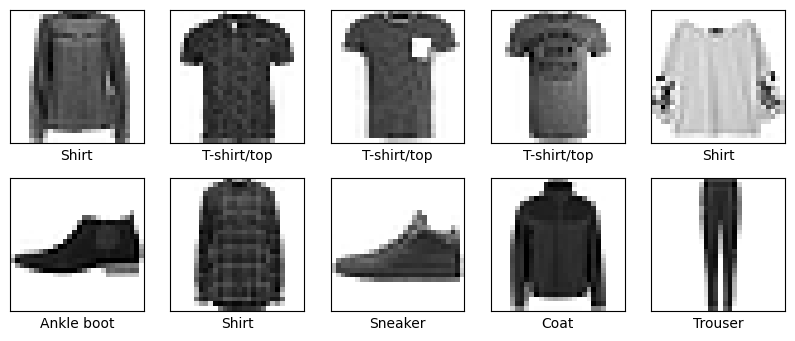

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set the figure size
plt.figure(figsize=(10, 4))

# Select 10 random indices
random_indices = np.random.choice(len(train_images), 10)

# Plot images and labels
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[idx]])

plt.show()

1. Ask ChatGPT to write a DCNN classifier for Fashion-MNIST data. Specify that the network should use the dropout layers and normalization layers. Code should save the trained network weights, and also save history (loss and accuracy).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7431 - loss: 0.7522 - val_accuracy: 0.8710 - val_loss: 0.3557
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8630 - loss: 0.3771 - val_accuracy: 0.8915 - val_loss: 0.2977
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8801 - loss: 0.3318 - val_accuracy: 0.8948 - val_loss: 0.2892
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8888 - loss: 0.3077 - val_accuracy: 0.8964 - val_loss: 0.2832
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8961 - loss: 0.2872 - val_accuracy: 0.8897 - val_loss: 0.2975
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9023 - loss: 0.2697 - val_accuracy: 0.9017 - val_loss: 0.2659
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9065 - loss: 0.2602 - val_accuracy: 0.9075 - val_loss: 0.2519
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9097 - loss: 0.25

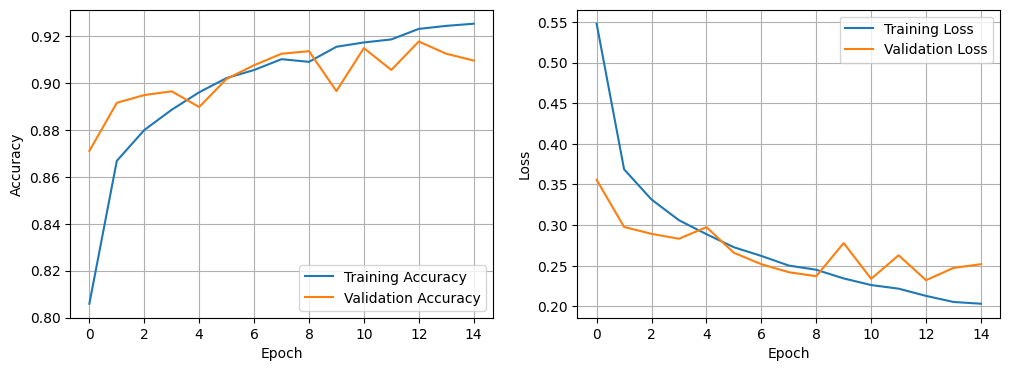

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

# Load the Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data for the convolutional layers
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a checkpoint callback to save the model weights with the .keras extension
checkpoint_path = "fashion_mnist_dcnn_weights.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_best_only=True, monitor='val_accuracy', mode='max'
)

# Train the model and save training history
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels),
                    callbacks=[checkpoint])

# Save training history (loss and accuracy)
history_data = {
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss'],
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy']
}

# Save the history data
with open("fashion_mnist_training_history.pkl", "wb") as file:
    pickle.dump(history_data, file)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7463 - loss: 0.7448 - val_accuracy: 0.8708 - val_loss: 0.3683
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8645 - loss: 0.3804 - val_accuracy: 0.8900 - val_loss: 0.3026
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8782 - loss: 0.3304 - val_accuracy: 0.8792 - val_loss: 0.3286
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8899 - loss: 0.3031 - val_accuracy: 0.9046 - val_loss: 0.2635
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8964 - loss: 0.2893 - val_accuracy: 0.9010 - val_loss: 0.2640
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9047 - loss: 0.2655 - val_accuracy: 0.9044 - val_loss: 0.2576
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9049 - loss: 0.2658 - val_accuracy: 0.9050 - val_loss: 0.2700
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9080 - loss: 0.2

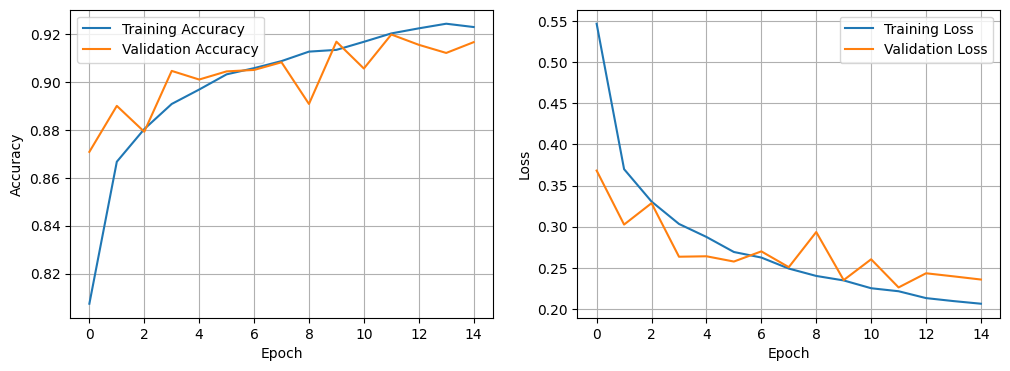

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle
import matplotlib.pyplot as plt

# Load and normalize Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the DCNN model with dropout and batch normalization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile and train the model with checkpointing for best model weights
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_path = "fashion_mnist_dcnn_weights.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_accuracy', mode='max')
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), callbacks=[checkpoint])

# Save training history
with open("fashion_mnist_training_history.pkl", "wb") as file:
    pickle.dump(history.history, file)

# Plot the training/validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


2. Plot the evolution of the loss and accuracy for trianing and test data

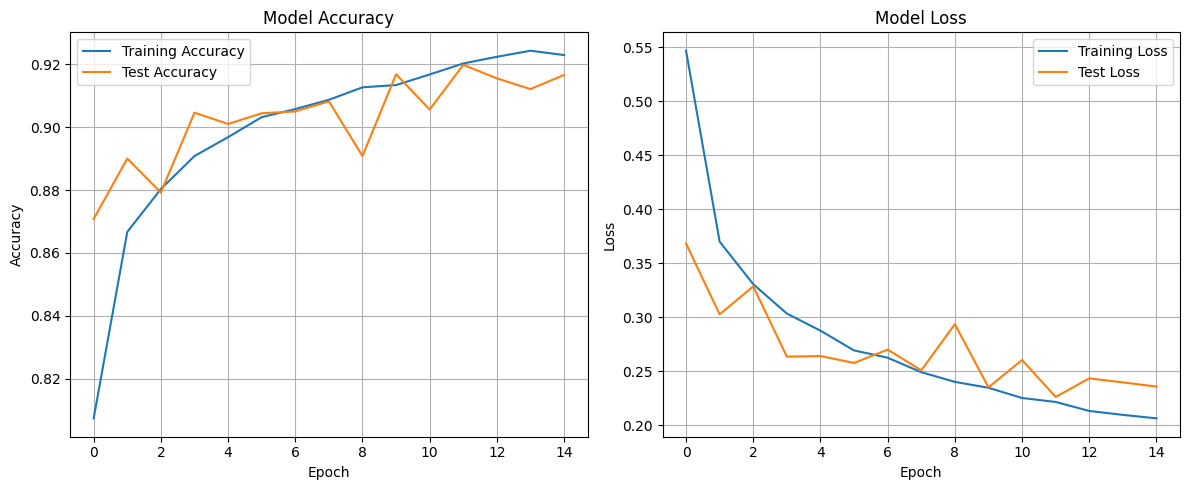

In [26]:
import matplotlib.pyplot as plt
import pickle

# Load training history
with open("fashion_mnist_training_history.pkl", "rb") as file:
    history_data = pickle.load(file)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


3. Ask ChatGPT to write the code to plot the ROC curve for the classifier

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


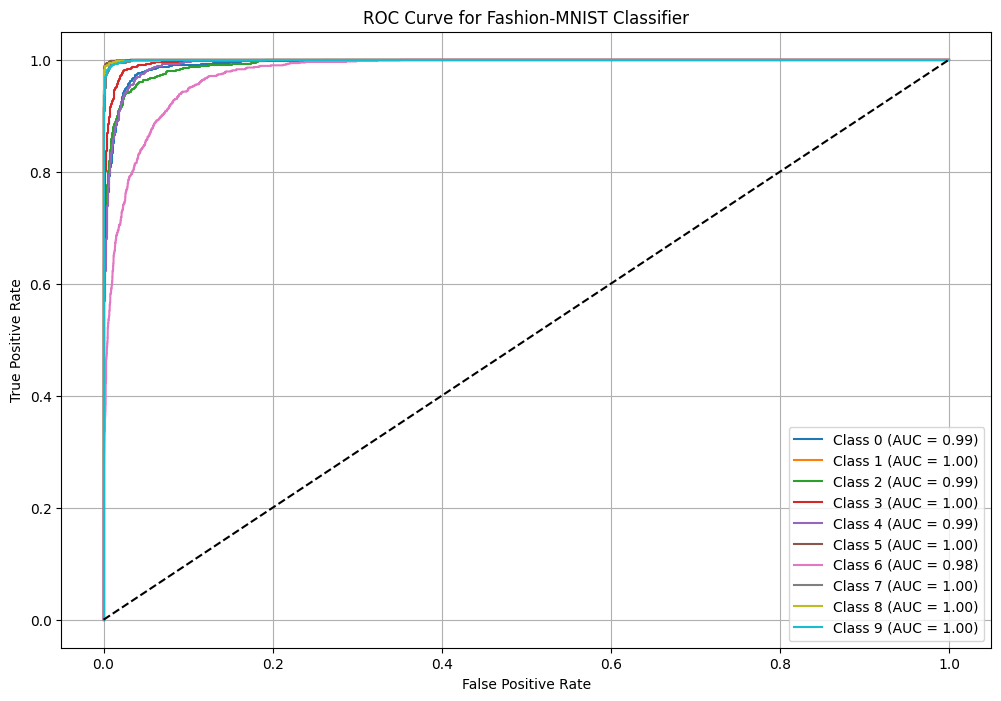

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the test data
fashion_mnist = tf.keras.datasets.fashion_mnist
(_, _), (test_images, test_labels) = fashion_mnist.load_data()
test_images = test_images / 255.0  # Normalize
test_images = test_images.reshape(-1, 28, 28, 1)

# Binarize the test labels for multi-class ROC
test_labels_binarized = label_binarize(test_labels, classes=range(10))

# Load the trained model (optional, if it needs to be reloaded)
model = tf.keras.models.load_model("fashion_mnist_dcnn_weights.keras")

# Get model predictions (probabilities)
y_score = model.predict(test_images)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fashion-MNIST Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


4. Ask ChatGPT (and provide answers below):
- What is the dimensionality of the input to the classifier?
- What is the dimensionality of the output?
- Why the loss function is chosen?
- What is the metrics for performance?
- What is the role of MaxPool layers?
- What is the role of batch normalization layers?
- Can we use the Relu rather then softmax in the final layer
- What is the function of dropout layers?

Dimensionality of the Input to the Classifier:

The input dimensionality to the classifier is (28, 28, 1). This represents 28x28 pixel grayscale images, where the 1 channel indicates that these images are single-channel (grayscale) as opposed to three-channel (RGB).
Dimensionality of the Output:

The output dimensionality is 10, corresponding to the 10 possible classes in the Fashion-MNIST dataset. Each output node represents the probability of the input image belonging to one of the classes (e.g., T-shirt/top, Trouser, Pullover, etc.).
Why the Loss Function is Chosen:

The loss function used is sparse categorical cross-entropy, which is appropriate for multi-class classification tasks where each image belongs to one of the distinct classes. Cross-entropy loss measures the difference between the true labels and the predicted probability distribution, penalizing incorrect predictions more severely. Sparse categorical cross-entropy is used here instead of categorical cross-entropy because the labels are in integer form rather than one-hot encoded.
Metric for Performance:

Accuracy is used as the main metric for performance, as it provides a straightforward measure of how many predictions are correct out of the total predictions. Accuracy is commonly used in balanced datasets where each class has similar importance, which suits Fashion-MNIST well.
Role of MaxPooling Layers:

MaxPooling layers reduce the spatial dimensions (height and width) of the input representation by selecting the maximum value within each patch of the feature map. This operation helps to:
Decrease the computational load and memory requirements.
Make the model more invariant to small translations in the input (shift invariance).
Retain the most salient features, as only the maximum values are kept.
Role of Batch Normalization Layers:

Batch normalization layers normalize the inputs of each layer to have a mean of 0 and a standard deviation of 1. This helps in:
Reducing the internal covariate shift, which stabilizes and accelerates training.
Allowing for higher learning rates, potentially leading to faster convergence.
Acting as a form of regularization, which can help in reducing overfitting.
Can We Use ReLU Instead of Softmax in the Final Layer?:

No, we cannot use ReLU (Rectified Linear Activation Unit) instead of Softmax in the final layer for a classification task.
Softmax converts the output into a probability distribution across classes, ensuring that all class probabilities sum to 1.
ReLU is a linear activation that outputs raw scores, which cannot be interpreted as probabilities. Therefore, Softmax is required in the final layer for multi-class classification to provide interpretable class probabilities.
Function of Dropout Layers:

Dropout layers randomly deactivate a fraction of neurons in the layer during training. This helps in:
Reducing overfitting by preventing the model from becoming too reliant on specific neurons.
Encouraging the network to learn more robust features, as it must learn to make predictions even with certain neurons turned off.
Acting as a form of regularization by introducing noise into the training process, which improves generalization on unseen data.

Answers:


5. Perform the ablation study. Rewrite the code so that:
- we change the number of neurons (let's say divide it by factor of two several times)
- save the training curve
- save the ROC curve
And then plot them jointly. For example, if originally you had neural network with (128, 256) neurons, then you will generate training and ROC curves for (128,256), (64,  128), (32, 64), AND (16, 32).

In [ ]:
import pickle
import os

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Binarize the test labels for ROC
test_labels_binarized = label_binarize(test_labels, classes=range(10))

# Initial neuron configuration for the dense layers
neuron_configs = [(128, 256), (64, 128), (32, 64), (16, 32)]
history_dict = {}
roc_data = {}

# Directory for saving results
if not os.path.exists("ablation_study_results"):
    os.makedirs("ablation_study_results")

for config in neuron_configs:
    print(f"Training model with dense layer configuration: {config}")

    # Define the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),

        layers.Dense(config[0], activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(config[1], activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and save history
    history = model.fit(
        train_images, train_labels,
        epochs=10, validation_data=(test_images, test_labels),
        verbose=2
    )

    # Save training history
    history_dict[config] = history.history

    # Generate predictions and ROC data
    y_score = model.predict(test_images)
    fpr_dict, tpr_dict, auc_dict = {}, {}, {}
    for i in range(10):
        fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_score[:, i])
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        auc_dict[i] = auc(fpr, tpr)

    roc_data[config] = {'fpr': fpr_dict, 'tpr': tpr_dict, 'auc': auc_dict}

# Save all data for later use
with open("ablation_study_results/training_history.pkl", "wb") as file:
    pickle.dump(history_dict, file)

with open("ablation_study_results/roc_data.pkl", "wb") as file:
    pickle.dump(roc_data, file)

# Plotting training curves for all configurations
plt.figure(figsize=(15, 6))
for config in neuron_configs:
    # Training accuracy and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_dict[config]['accuracy'], label=f'Train Acc - {config}')
    plt.plot(history_dict[config]['val_accuracy'], '--', label=f'Val Acc - {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # Training loss and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history_dict[config]['loss'], label=f'Train Loss - {config}')
    plt.plot(history_dict[config]['val_loss'], '--', label=f'Val Loss - {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot ROC curves for all configurations
for config in neuron_configs:
    plt.figure(figsize=(12, 8))
    for i in range(10):
        plt.plot(roc_data[config]['fpr'][i], roc_data[config]['tpr'][i],
                 label=f'Class {i} (AUC = {roc_data[config]["auc"][i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Dense Layer Config: {config}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


Training model with dense layer configuration: (128, 256)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 15s - 8ms/step - accuracy: 0.7662 - loss: 0.6674 - val_accuracy: 0.8464 - val_loss: 0.3967
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8504 - loss: 0.4233 - val_accuracy: 0.8740 - val_loss: 0.3345
Epoch 3/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8680 - loss: 0.3704 - val_accuracy: 0.8653 - val_loss: 0.3701
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8776 - loss: 0.3430 - val_accuracy: 0.8858 - val_loss: 0.3134
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8889 - loss: 0.3174 - val_accuracy: 0.8770 - val_loss: 0.3320
Epoch 6/10


# Fashion MNIST VAE

6. Ask Chat GPT to write the simple MLP AE for Fashion MNIST data. Visualzie the latent distribution and latent representations.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images for MLP input
train_images_flat = train_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

# Define MLP Autoencoder architecture
encoding_dim = 64  # Dimension of the latent space

# Encoder
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(latent)
decoded = layers.Dense(128, activation='relu')(decoded)
output_img = layers.Dense(784, activation='sigmoid')(decoded)

# Build and compile the autoencoder model
autoencoder = models.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(train_images_flat, train_images_flat,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(test_images_flat, test_images_flat))

# Encoder model for extracting latent representations
encoder = models.Model(input_img, latent)
latent_representations = encoder.predict(test_images_flat)

# Visualize the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()

# Visualize the latent space (2D or 3D projection for simplicity)
# Use PCA or t-SNE to reduce the dimensionality of the latent space if needed

# Visualize the latent representations with t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_representations)

# Plot the latent space with labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=test_labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label='Classes')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Visualization of Latent Representations (t-SNE)')
plt.show()


7. Ask Chat GPT to write the DCNN VAE AE for Fashion MNIST data. Visualzie the latent distribution and latent representations. Modify the program to save the latent represnetation and latent distributions every 5 steps as images.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Latent dimension
latent_dim = 2  # Set to 2 for easier visualization

# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(input_img)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

# Latent space
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])

# Decoder
decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoded_img = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

# Define encoder and decoder models
encoder = Model(input_img, [z_mean, z_log_var, z], name="encoder")
decoder = Model(decoder_input, decoded_img, name="decoder")

# VAE Model
output = decoder(encoder(input_img)[2])
vae = Model(input_img, output, name="vae")

# Custom VAE Loss Layer
class VAELossLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(VAELossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        input_img, output, z_mean, z_log_var = inputs
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(input_img, output)
        ) * 28 * 28
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return output

# Apply the custom loss layer
vae_output = VAELossLayer()([input_img, output, z_mean, z_log_var])
vae = Model(input_img, vae_output, name="vae_with_loss")

# Compile the model
vae.compile(optimizer='adam')

# Directory for saving images
if not os.path.exists("latent_visualizations"):
    os.makedirs("latent_visualizations")

# Training callback to save latent representations and distributions
class LatentVisualizationCallback(tf.keras.callbacks.Callback):
    def __init__(self, encoder, interval=5):
        super().__init__()
        self.encoder = encoder
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            # Get the latent representations
            z_mean, _, z = self.encoder.predict(test_images)

            # t-SNE for 2D projection if latent_dim > 2
            if latent_dim > 2:
                z_2d = TSNE(n_components=2).fit_transform(z)
            else:
                z_2d = z

            # Plot latent space distribution
            plt.figure(figsize=(8, 6))
            plt.scatter(z_2d[:, 0], z_2d[:, 1], c=test_labels, cmap='tab10', alpha=0.7)
            plt.colorbar()
            plt.xlabel("Latent Dimension 1")
            plt.ylabel("Latent Dimension 2")
            plt.title(f"Latent Space Distribution at Epoch {epoch+1}")
            plt.savefig(f"latent_visualizations/latent_distribution_epoch_{epoch+1}.png")
            plt.close()

# Train the VAE model and save latent distributions every 5 epochs
vae.fit(train_images, train_images,
        epochs=50,
        batch_size=128,
        validation_data=(test_images, test_images),
        callbacks=[LatentVisualizationCallback(encoder)])

# Plot final latent space distribution after training
z_mean, _, z = encoder.predict(test_images)
z_2d = TSNE(n_components=2).fit_transform(z) if latent_dim > 2 else z

plt.figure(figsize=(8, 6))
plt.scatter(z_2d[:, 0], z_2d[:, 1], c=test_labels, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Final Latent Space Distribution")
plt.show()


8. Can you upload the images and make a movie?

In [ ]:
import cv2
import os
from glob import glob

# Directory where images are saved
image_dir = "latent_visualizations"
output_video_path = "latent_distributions_video.mp4"

# Get all image paths and sort by filename to ensure correct order
image_paths = sorted(glob(os.path.join(image_dir, "*.png")))

# Check if we have images to process
if not image_paths:
    print("No images found in the specified directory. Ensure images were saved correctly.")
else:
    # Read the first image to get dimensions
    frame = cv2.imread(image_paths[0])
    height, width, layers = frame.shape

    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Video codec for mp4
    video = cv2.VideoWriter(output_video_path, fourcc, 1, (width, height))  # 1 frame per second

    # Add each image as a frame in the video
    for image_path in image_paths:
        frame = cv2.imread(image_path)
        video.write(frame)

    # Release the video writer
    video.release()
    print(f"Video saved as {output_video_path}")


9. Write the defintions for:
- Latent istribution
- Latent represnetation
- Disentangling of represnetations
- Conditional VAE

Answers:
Latent Distribution
A latent distribution is a probability distribution over the latent variables in a model, representing the underlying factors that describe the essential features or variations in the observed data. In the context of VAEs, the latent distribution is typically modeled as a Gaussian distribution with parameters (mean and variance) derived from the encoder network. This distribution defines the possible values for the latent variables, which are sampled during training and decoding to generate or reconstruct data instances.

Latent Representation
A latent representation is a compressed, encoded form of the data that captures its essential characteristics in a low-dimensional space. This representation is learned by the encoder in a VAE and serves as a hidden, often more abstract, version of the original data. Latent representations are essential in machine learning because they allow models to focus on the underlying structure of the data rather than superficial details, which is useful for tasks such as generation, clustering, and classification.

Disentangling of Representations
Disentangling of representations refers to the process of separating different generative factors within a latent representation, so that each latent variable or dimension represents a distinct aspect of the data. In a disentangled representation, changes to one latent variable would ideally influence only one aspect of the data, allowing for more interpretable and controllable representations. Disentangled representations are valuable for applications like image generation, where controlling individual latent factors (e.g., lighting, orientation) can produce varied but specific outputs.

Conditional Variational Autoencoder (Conditional VAE)
A Conditional VAE is an extension of the Variational Autoencoder that incorporates additional conditioning information (such as class labels or other attributes) into the encoding and decoding process. By conditioning the model on this extra information, Conditional VAEs can learn to generate samples that align with specified conditions, effectively allowing for more targeted control over the generated data. For example, in an image generation task, a Conditional VAE could generate images of a particular category (e.g., dogs or cats) based on a label input during both training and sampling.

10. Explore if the ChatGPT can write a code for the VAE with rotational invariance

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K

# Define encoder
def build_encoder(latent_dim):
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)

    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    encoder = models.Model(inputs, [z_mean, z_log_var], name="encoder")
    encoder.summary()
    return encoder

# Sampling function to sample from the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    z = z_mean + K.exp(0.5 * z_log_var) * epsilon
    return z

# Define decoder
def build_decoder(latent_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(latent_inputs)
    x = layers.Dense(7 * 7 * 64, activation='relu')(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

    decoder = models.Model(latent_inputs, outputs, name="decoder")
    decoder.summary()
    return decoder

# VAE loss function
def vae_loss(inputs, output_img, z_mean, z_log_var):
    # Flatten both inputs and output for binary cross-entropy
    flattened_inputs = K.flatten(inputs)
    flattened_output_img = K.flatten(output_img)

    # Compute the reconstruction loss (binary cross-entropy)
    reconstruction_loss = tf.reduce_mean(
        tf.keras.losses.binary_crossentropy(flattened_inputs, flattened_output_img)
    )
    reconstruction_loss *= 28 * 28  # Scale the reconstruction loss

    # Compute the KL divergence loss
    kl_loss = -0.5 * tf.reduce_sum(
        1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1
    )

    # Return the total VAE loss (sum of reconstruction and KL losses)
    return tf.reduce_mean(reconstruction_loss + kl_loss)

# Build VAE model
latent_dim = 2  # Latent space dimension
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)

# Encoder output
z_mean, z_log_var = encoder.output
z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder output
output_img = decoder(z)

# Define VAE model
vae = models.Model(encoder.input, output_img, name="vae")

# Add the VAE loss to the model
vae.add_loss(lambda: vae_loss(encoder.input, output_img, z_mean, z_log_var))
vae.compile(optimizer="adam")

# Print the model summary
vae.summary()

# Train the VAE
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.

# Data generator for training
batch_size = 128
epochs = 50

vae.fit(x_train, x_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, x_test))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.datasets import mnist

# Define encoder
def build_encoder(latent_dim):
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)

    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    encoder = models.Model(inputs, [z_mean, z_log_var], name="encoder")
    encoder.summary()
    return encoder

# Sampling function to sample from the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    z = z_mean + K.exp(0.5 * z_log_var) * epsilon
    return z

# Define decoder
def build_decoder(latent_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(latent_inputs)
    x = layers.Dense(7 * 7 * 64, activation='relu')(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

    decoder = models.Model(latent_inputs, outputs, name="decoder")
    decoder.summary()
    return decoder

# VAE loss function
def vae_loss(inputs, output_img, z_mean, z_log_var):
    # Flatten both inputs and output for binary cross-entropy
    flattened_inputs = K.flatten(inputs)
    flattened_output_img = K.flatten(output_img)

    # Compute the reconstruction loss (binary cross-entropy)
    reconstruction_loss = tf.reduce_mean(
        tf.keras.losses.binary_crossentropy(flattened_inputs, flattened_output_img)
    )
    reconstruction_loss *= 28 * 28  # Scale the reconstruction loss

    # Compute the KL divergence loss
    kl_loss = -0.5 * tf.reduce_sum(
        1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1
    )

    # Return the total VAE loss (sum of reconstruction and KL losses)
    return tf.reduce_mean(reconstruction_loss + kl_loss)

# Build VAE model
latent_dim = 2  # Latent space dimension
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)

# Encoder output
z_mean, z_log_var = encoder.output
z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder output
output_img = decoder(z)

# Define VAE model
vae = models.Model(encoder.input, output_img, name="vae")

# Compile the model
vae.compile(optimizer="adam")

# Print the model summary
vae.summary()

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.

# Data generator for training
batch_size = 128
epochs = 50

# Custom training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for i in range(0, len(x_train), batch_size):
        x_batch_train = x_train[i:i + batch_size]

        with tf.GradientTape() as tape:
            z_mean_batch, z_log_var_batch = encoder(x_batch_train)
            z_batch = sampling([z_mean_batch, z_log_var_batch])
            output_batch = decoder(z_batch)

            # Compute the loss
            loss = vae_loss(x_batch_train, output_batch, z_mean_batch, z_log_var_batch)

        # Compute gradients and update model weights
        grads = tape.gradient(loss, vae.trainable_variables)
        vae.optimizer.apply_gradients(zip(grads, vae.trainable_variables))

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")

# Evaluate the model on the test set
output_test = vae.predict(x_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
import numpy as np
from tensorflow.keras.datasets import mnist

# Define encoder with data augmentation for rotational invariance
def build_encoder(latent_dim):
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.RandomRotation(0.2)(inputs)  # Apply random rotations to enforce rotational invariance
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)

    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    encoder = models.Model(inputs, [z_mean, z_log_var], name="encoder")
    encoder.summary()
    return encoder

# Sampling function for reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Define decoder
def build_decoder(latent_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(latent_inputs)
    x = layers.Dense(7 * 7 * 64, activation='relu')(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

    decoder = models.Model(latent_inputs, outputs, name="decoder")
    decoder.summary()
    return decoder

# VAE loss function
def vae_loss(inputs, outputs, z_mean, z_log_var):
    # Flatten both inputs and output for binary cross-entropy
    flattened_inputs = K.flatten(inputs)
    flattened_outputs = K.flatten(outputs)

    # Reconstruction loss (binary cross-entropy)
    reconstruction_loss = tf.reduce_mean(
        tf.keras.losses.binary_crossentropy(flattened_inputs, flattened_outputs)
    )
    reconstruction_loss *= 28 * 28  # Scale by image size

    # KL divergence loss
    kl_loss = -0.5 * tf.reduce_sum(
        1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1
    )
    return tf.reduce_mean(reconstruction_loss + kl_loss)

# Build VAE
latent_dim = 2
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)

# Define inputs, sampling, and outputs
z_mean, z_log_var = encoder.output
z = layers.Lambda(sampling, name="sampling")([z_mean, z_log_var])
outputs = decoder(z)

# Define the VAE model
vae = models.Model(encoder.input, outputs, name="vae")

# Compile VAE model with a custom training loop
vae.compile(optimizer="adam")

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.

# Set up training parameters
batch_size = 128
epochs = 50

# Custom training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for i in range(0, len(x_train), batch_size):
        x_batch_train = x_train[i:i + batch_size]

        with tf.GradientTape() as tape:
            # Forward pass
            z_mean_batch, z_log_var_batch = encoder(x_batch_train)
            z_batch = sampling([z_mean_batch, z_log_var_batch])
            output_batch = decoder(z_batch)

            # Compute the loss
            loss = vae_loss(x_batch_train, output_batch, z_mean_batch, z_log_var_batch)

        # Compute gradients and update model weights
        grads = tape.gradient(loss, vae.trainable_variables)
        vae.optimizer.apply_gradients(zip(grads, vae.trainable_variables))

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")

# Evaluate the VAE on the test set
output_test = vae.predict(x_test)


Answers:

11. Ask ChatGPT to write a class-conditioned VAE and plot the latent represnetations.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape, Concatenate, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = np.expand_dims(train_images, -1) / 255.0
test_images = np.expand_dims(test_images, -1) / 255.0

# Define image dimensions, latent space size, and number of classes
img_shape = (28, 28, 1)
latent_dim = 2
num_classes = 10

# Convert labels to one-hot vectors for conditioning
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes)

# Define the encoder model with conditioning
inputs = Input(shape=img_shape)
label_input = Input(shape=(num_classes,))  # Condition input

# Encoder network
x = Conv2D(32, 3, activation="relu", strides=2, padding="same")(inputs)
x = Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = Flatten()(x)
x = Concatenate()([x, label_input])  # Concatenate label conditioning
x = Dense(16, activation="relu")(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Latent vector
z = Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
z_cond = Concatenate()([z, label_input])  # Concatenate label conditioning to latent space

# Define the decoder model
decoder_inputs = Input(shape=(latent_dim + num_classes,))
x = Dense(7 * 7 * 64, activation="relu")(decoder_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
outputs = Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

# Build encoder and decoder models
encoder = Model([inputs, label_input], [z_mean, z_log_var, z], name="encoder")
decoder = Model(decoder_inputs, outputs, name="decoder")
output_img = decoder(z_cond)
cvae = Model([inputs, label_input], output_img, name="cvae")

# Define VAE loss function using a custom layer
class VAELossLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        inputs, outputs, z_mean, z_log_var = inputs
        # Compute reconstruction loss
        reconstruction_loss = binary_crossentropy(tf.keras.layers.Flatten()(inputs), tf.keras.layers.Flatten()(outputs))
        reconstruction_loss *= 28 * 28
        # Compute KL divergence loss
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = -0.5 * K.sum(kl_loss, axis=-1)
        # Total loss
        return K.mean(reconstruction_loss + kl_loss)

# Apply the loss layer
loss_layer = VAELossLayer()([inputs, output_img, z_mean, z_log_var])
cvae.add_loss(loss_layer)
cvae.compile(optimizer="adam")

# Train the model
batch_size = 128
epochs = 50
cvae.fit([train_images, train_labels_onehot], train_images,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=([test_images, test_labels_onehot], test_images))

# Plot latent space for each class
def plot_latent_space(encoder, data, labels, num_classes=10):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        # Select data points of the current class
        indices = np.where(labels == i)[0]
        class_data = data[indices]
        class_labels = tf.keras.utils.to_categorical(labels[indices], num_classes)

        # Predict mean of the latent space
        z_mean, _, _ = encoder.predict([class_data, class_labels])

        # Plot latent space with different colors for each class
        plt.scatter(z_mean[:, 0], z_mean[:, 1], label=str(i), alpha=0.6)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.legend(title="Class")
    plt.title("Latent Space of Conditioned VAE by Class")
    plt.show()

# Visualize latent space for test images
plot_latent_space(encoder, test_images, test_labels)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape, Concatenate, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

# Load and preprocess Fashion MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = np.expand_dims(train_images, -1) / 255.0
test_images = np.expand_dims(test_images, -1) / 255.0
num_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert labels to one-hot for conditioning
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes)

# Model parameters
img_shape = (28, 28, 1)
latent_dim = 2

# Encoder
inputs = Input(shape=img_shape)
label_input = Input(shape=(num_classes,))
x = Conv2D(32, 3, activation="relu", strides=2, padding="same")(inputs)
x = Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = Flatten()(x)
x = Concatenate()([x, label_input])
x = Dense(16, activation="relu")(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
z_cond = Concatenate()([z, label_input])

# Decoder
decoder_inputs = Input(shape=(latent_dim + num_classes,))
x = Dense(7 * 7 * 64, activation="relu")(decoder_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
outputs = Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

# Models
encoder = Model([inputs, label_input], [z_mean, z_log_var, z], name="encoder")
decoder = Model(decoder_inputs, outputs, name="decoder")
cvae_outputs = decoder(z_cond)
cvae = Model([inputs, label_input], cvae_outputs, name="cvae")

# VAE loss
reconstruction_loss = tf.reduce_sum(
    binary_crossentropy(K.flatten(inputs), K.flatten(cvae_outputs)), axis=-1
)
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = -0.5 * K.sum(kl_loss, axis=-1)
cvae.add_loss(K.mean(reconstruction_loss + kl_loss))
cvae.compile(optimizer="adam")

# Train
cvae.fit([train_images, train_labels_onehot], train_images,
         epochs=50,
         batch_size=128,
         validation_data=([test_images, test_labels_onehot], test_images))

# Plot latent space for each class
def plot_latent_space(encoder, data, labels, num_classes=10):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        indices = np.where(labels == i)[0]
        class_data = data[indices]
        class_labels = tf.keras.utils.to_categorical(labels[indices], num_classes)
        z_mean, _, _ = encoder.predict([class_data, class_labels])
        plt.scatter(z_mean[:, 0], z_mean[:, 1], label=class_names[i], alpha=0.6)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.legend(title="Class")
    plt.title("Latent Space of Conditioned VAE by Class")
    plt.show()

plot_latent_space(encoder, test_images, test_labels)


12. Can you identify the meaning of the latent variables?

Answers:
In a Variational Autoencoder (VAE), the latent variables represent compressed representations of the original data. However, they typically lack direct interpretability, especially if the VAE is trained without any explicit supervision or additional constraints to shape their meaning. The latent space variables capture underlying features of the data, such as general characteristics, but their exact meaning depends on the data structure and how the VAE organizes that information.

Here’s a breakdown of how we might interpret or understand the meaning of latent variables in a VAE:

1. Feature Extraction and Encoding Complex Patterns
VAEs learn a compressed representation of the data, typically by clustering similar data points in the latent space. The dimensions of this space capture variations and correlations in the dataset. For example, with image data like MNIST digits, latent variables might organize information about the general shape, orientation, or stroke style.
Since our latent space here is 2D, we might see a smooth transition between digit shapes or intensity when we visualize the latent space. For instance, as you move across the latent space, the generated images might shift gradually from one digit to another, revealing how the VAE learned to represent different classes within the continuous latent space.
2. Understanding Latent Variables through Interpolation and Sampling
By sampling points along a line between two locations in latent space, we can observe how the VAE “morphs” one image into another. This provides insight into the "directions" the model considers important in the latent space. If sampling between two latent points results in gradual changes in brightness, orientation, or shape, then the VAE might be encoding those characteristics along that direction.
3. Cluster Visualization in Latent Space
When you reduce the latent space to two dimensions and visualize it (as in our code above), natural clustering can reveal the presence of meaningful groupings. For example, in the MNIST dataset, the VAE’s latent space might loosely group similar digits together (e.g., all '0's near each other, '1's together), even though no labels were provided. This shows the VAE has learned features that correspond to digit similarity.
4. Latent Variables for Anomaly Detection
In anomaly detection, the latent variables can indicate how "normal" or "anomalous" an image is relative to the training data distribution. Images that reconstruct poorly (i.e., have a high reconstruction error) suggest the VAE has encoded information that doesn’t match well with typical samples in the dataset. Anomalies in the latent space often have latent representations that lie outside of the high-density areas (typical samples) in the space.
5. Adding Supervision or Constraints to Interpret Latent Variables
Without additional constraints, latent variables tend to capture general, abstract patterns rather than specific, interpretable ones. For example, adding a "conditional" element (like conditioning on class labels) to a VAE could force the latent variables to represent specific features related to each class. This approach is called a Conditional VAE (CVAE) and can make latent variables more interpretable by design.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255
input_shape = (28, 28, 1)

# VAE model parameters
latent_dim = 2  # For 2D latent space

# Encoder model
encoder_inputs = tf.keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

# Encoder model
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# Decoder model
decoder_inputs = tf.keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(decoder_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

# Decoder model
decoder = Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

# VAE model
outputs = decoder(encoder(encoder_inputs)[2])
vae = Model(encoder_inputs, outputs, name="vae")

# VAE Loss function
reconstruction_loss = tf.keras.losses.binary_crossentropy(encoder_inputs, outputs)
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1) * -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer="adam")

# Train the VAE
vae.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

# Visualization of the 2D latent space
n = 20  # Grid size
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)

figure = np.zeros((28 * n, 28 * n))
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(28, 28)
        figure[i * 28: (i + 1) * 28,
               j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.axis("off")
plt.show()


13. Explore with ChatGPT how VAEs are used for (one of):
- Image analysis
- Deep fakes
- Natural Language Programming
- Drug discovery
- Property optimization

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Define the encoder
def build_encoder(latent_dim):
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)

    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    encoder = models.Model(inputs, [z_mean, z_log_var], name="encoder")
    return encoder

# Sampling function for reparameterization
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Define the decoder
def build_decoder(latent_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(latent_inputs)
    x = layers.Dense(7 * 7 * 64, activation='relu')(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

    decoder = models.Model(latent_inputs, outputs, name="decoder")
    return decoder

# VAE loss
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.reduce_mean(
        tf.keras.losses.binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
    ) * 28 * 28
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return tf.reduce_mean(reconstruction_loss + kl_loss)

# Hyperparameters
latent_dim = 2

# Build encoder and decoder
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)

# Connect encoder and decoder with the sampling layer
z_mean, z_log_var = encoder.output
z = layers.Lambda(sampling)([z_mean, z_log_var])
outputs = decoder(z)

# Define the VAE model
vae = models.Model(encoder.input, outputs, name="vae")

# Compile the VAE with custom loss
vae.add_loss(vae_loss(encoder.input, outputs, z_mean, z_log_var))
vae.compile(optimizer="adam")

# Load and preprocess MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255.
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.

# Train the VAE
vae.fit(x_train, epochs=10, batch_size=128, validation_data=(x_test, None))

# 1. Image Generation
n = 10  # Number of images to generate
fig, ax = plt.subplots(1, n, figsize=(20, 4))
for i in range(n):
    z_sample = np.random.normal(size=(1, latent_dim))
    generated_img = decoder.predict(z_sample)
    ax[i].imshow(generated_img[0, :, :, 0], cmap='gray')
    ax[i].axis('off')
plt.suptitle("Generated Images")
plt.show()

# 2. Denoising
# Add noise to testing data
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoise images by encoding and decoding
denoised_imgs = vae.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.suptitle("Denoising Images with VAE")
plt.show()

# 3. Anomaly Detection
# Reconstruction errors for normal test images
reconstruction_errors = []
for img in x_test:
    img = np.expand_dims(img, 0)
    reconstructed_img = vae.predict(img)
    reconstruction_error = vae_loss(img, reconstructed_img, *encoder.predict(img))
    reconstruction_errors.append(reconstruction_error.numpy())

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)

# Detect anomalies
anomalies = [x_test[i] for i, error in enumerate(reconstruction_errors) if error > threshold]

# Display some anomalies
n = min(len(anomalies), 10)
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(anomalies[i].reshape(28, 28), cmap='gray')
    ax.axis("off")
plt.suptitle("Anomalies Detected by VAE")
plt.show()

# 4. Dimensionality Reduction for Visualization
# Project test images into the 2D latent space
z_mean, _ = encoder.predict(x_test)

# Plot the 2D latent space
plt.figure(figsize=(8, 6))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c='b', alpha=0.5, s=2)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title("2D Latent Space of Test Images")
plt.show()


In [ ]:
pip install rdkit-pypi


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Embedding, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import string

# Example: Load or create your SMILES dataset
train_smiles = [
    'CCO', 'CCN', 'CCC', 'COC', 'CN', 'CCCO', 'CCCC', 'CC(=O)O', 'CC(=O)N', 'CC(C)O'
]  # This should be replaced with your actual dataset

# Define characters used in SMILES strings (including special symbols and characters)
smiles_chars = 'CNO=()[]#$%0123456789abcdefghijklmnopqrstuvwxyz'
char_to_idx = {char: idx for idx, char in enumerate(smiles_chars)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

# Encode SMILES strings as integers (one-hot encoding)
def encode_smiles(smiles, char_to_idx):
    return [char_to_idx.get(char, 0) for char in smiles]  # 0 is used for unknown characters

# Encode all SMILES strings in the dataset
encoded_smiles = [encode_smiles(smiles, char_to_idx) for smiles in train_smiles]

# Set max sequence length for padding
max_sequence_length = 20  # Adjust based on your data

# Pad sequences to ensure consistent input size
train_data = pad_sequences(encoded_smiles, maxlen=max_sequence_length, padding='post')

# Expand dimensions to add a channel for single input dimensions (e.g., one-hot encoding)
train_data_expanded = np.expand_dims(train_data, -1)

# Define the VAE model
latent_dim = 2  # Set the latent dimensionality for the VAE

# Encoder
inputs = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(smiles_chars), output_dim=32)(inputs)
x = LSTM(64)(embedding_layer)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

# Sampling function for the VAE
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(64, activation='relu')(latent_inputs)
x = Dense(max_sequence_length, activation='softmax')(x)

decoder = Model(latent_inputs, x)

# Define the VAE loss function
def vae_loss(inputs, vae_outputs, z_mean, z_log_var):
    reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(vae_outputs)) * max_sequence_length
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = -0.5 * K.sum(kl_loss, axis=-1)
    return K.mean(reconstruction_loss + kl_loss)

# Define the VAE model that includes the decoder and computes the loss during the forward pass
vae_outputs = decoder(z)
vae = Model(inputs, vae_outputs)

# Custom training loop
optimizer = tf.keras.optimizers.Adam()

@tf.function
def train_step(data):
    with tf.GradientTape() as tape:
        inputs, labels = data
        vae_outputs = vae(inputs)  # Forward pass
        loss = vae_loss(inputs, vae_outputs, z_mean, z_log_var)  # Compute the loss
    gradients = tape.gradient(loss, vae.trainable_variables)
    optimizer.apply_gradients(zip(gradients, vae.trainable_variables))
    return loss

# Prepare dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_data))
train_dataset = train_dataset.batch(32)

# Training loop
epochs = 50
for epoch in range(epochs):
    total_loss = 0
    for data in train_dataset:
        loss = train_step(data)
        total_loss += loss
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss.numpy()}')

# Generate new SMILES using the decoder
def decode_latent(latent_variables):
    decoded = decoder.predict(latent_variables)
    decoded_indices = np.argmax(decoded, axis=-1)
    decoded_smiles = [''.join([idx_to_char[i] for i in smile]) for smile in decoded_indices]
    return decoded_smiles

# Sampling from the latent space and decoding
latent_samples = np.random.normal(size=(10, latent_dim))
generated_smiles = decode_latent(latent_samples)
print(generated_smiles)


# Example

14. Example: VAE written by ChatGPT

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

latent_dim = 2  # Dimensionality of the latent space

inputs = Input(shape=(image_size, image_size, 1), name='encoder_input')
x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= image_size * image_size
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, epochs=30, batch_size=128, validation_data=(x_test, None))

def plot_label_clusters(encoder, data, labels):
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(encoder, x_test, y_test)

n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()